In [1]:
%load_ext autoreload
%autoreload 2

### Libraries for analysis

In [2]:
! pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
warnings.filterwarnings("ignore",category=FutureWarning)

 ### Data importation

In [4]:
df = pd.read_parquet("data/transformed_df.parquet")

#Data cleaning
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df["Year"] = df["Year"].astype(str)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Year,Month,...,growth_BZ=F_7d,growth_BZ=F_30d,growth_BZ=F_90d,growth_BZ=F_365d,growth_BTC-USD_1d,growth_BTC-USD_3d,growth_BTC-USD_7d,growth_BTC-USD_30d,growth_BTC-USD_90d,growth_BTC-USD_365d
0,0.787090,0.844316,0.763168,0.840094,535796800.0,0.0,0.0,AAPL,2000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.812420,0.830244,0.759415,0.769266,512377600.0,0.0,0.0,AAPL,2000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.778647,0.829775,0.773018,0.780523,778321600.0,0.0,0.0,AAPL,2000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.796472,0.803038,0.712978,0.712978,767972800.0,0.0,0.0,AAPL,2000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.724235,0.758008,0.716731,0.746751,460734400.0,0.0,0.0,AAPL,2000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Descriptive data analysis

In [5]:
x = df.keys()

for val in x:
    print(val)

Open
High
Low
Close
Volume
Dividends
Stock Splits
Ticker
Year
Month
Weekday
Date
growth_1d
growth_3d
growth_7d
growth_30d
growth_90d
growth_365d
growth_future_30d
SMA10
SMA20
growing_moving_average
high_minus_low_relative
volatility
is_positive_growth_30d_future
Capital Gains
adx
adxr
apo
aroon_1
aroon_2
aroonosc
bop
cci
cmo
dx
macd
macdsignal
macdhist
macd_ext
macdsignal_ext
macdhist_ext
macd_fix
macdsignal_fix
macdhist_fix
mfi
minus_di
mom
plus_di
dm
ppo
roc
rocp
rocr
rocr100
rsi
slowk
slowd
fastk
fastd
fastk_rsi
fastd_rsi
trix
ultosc
willr
ad
adosc
obv
atr
natr
ht_dcperiod
ht_dcphase
ht_phasor_inphase
ht_phasor_quadrature
ht_sine_sine
ht_sine_leadsine
ht_trendmod
avgprice
medprice
typprice
wclprice
cdl2crows
cdl3blackrows
cdl3inside
cdl3linestrike
cdl3outside
cdl3starsinsouth
cdl3whitesoldiers
cdlabandonedbaby
cdladvancedblock
cdlbelthold
cdlbreakaway
cdlclosingmarubozu
cdlconcealbabyswall
cdlcounterattack
cdldarkcloudcover
cdldoji
cdldojistar
cdldragonflydoji
cdlengulfing
cdlevenin

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Month,Weekday,growth_1d,...,growth_BZ=F_7d,growth_BZ=F_30d,growth_BZ=F_90d,growth_BZ=F_365d,growth_BTC-USD_1d,growth_BTC-USD_3d,growth_BTC-USD_7d,growth_BTC-USD_30d,growth_BTC-USD_90d,growth_BTC-USD_365d
count,836268.000000,836268.000000,836268.000000,836268.000000,8.362680e+05,836268.000000,836268.000000,836268.000000,836268.000000,836192.000000,...,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000,835151.000000
mean,345.236856,349.488276,340.680587,345.008056,1.872571e+07,0.017289,0.000728,6.498648,2.009936,1.012127,...,0.743055,0.744653,0.748567,0.742984,0.493491,0.495308,0.498922,0.521770,0.594388,1.149928
min,-0.011106,-0.011148,-0.010666,-0.011024,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-3.964145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,21.306930,20.674573,20.997796,1.228500e+06,0.000000,0.000000,4.000000,1.000000,0.990398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.228220,51.865410,50.498703,51.197741,4.392574e+06,0.000000,0.000000,7.000000,2.000000,1.000088,...,0.983685,0.964359,0.933709,0.812564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,161.285029,163.341879,159.020098,161.210022,1.122010e+07,0.000000,0.000000,9.000000,3.000000,1.010657,...,1.022660,1.054471,1.097680,1.110689,1.000975,1.003717,1.005854,1.029838,1.091264,1.682124
max,32490.000000,32490.000000,31665.000000,32345.000000,9.230856e+09,210.000000,20.000000,12.000000,6.000000,3750.000213,...,1.486743,2.060030,2.332644,4.062080,1.252472,1.535506,1.749111,2.926924,5.200780,24.178967
std,1448.612215,1466.182702,1429.464466,1447.415173,8.426548e+07,0.760141,0.065571,3.419955,1.406292,4.402453,...,0.441659,0.456703,0.495537,0.630803,0.501812,0.505184,0.511709,0.557625,0.721545,2.206931


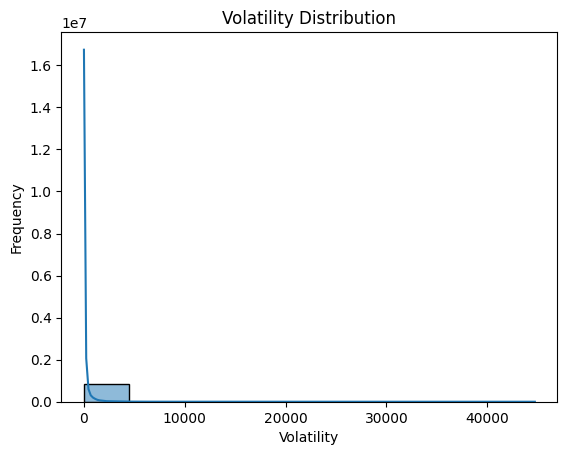

In [7]:
# Understanding the distiribution of the volatility
sns.histplot(df["volatility"], bins=10, kde=True)
plt.title("Volatility Distribution")
plt.xlabel("Volatility")
plt.ylabel("Frequency")
plt.show();

#The volatility distribution is right skewed.

### Exploratory Data Analysis

In [8]:
x = df.Ticker.nunique()

print(f'Number of available tickers is {x}') #This is to help us get the number of represented tickers
print(df["Ticker"].unique())

Number of available tickers is 157
['AAPL' 'MSFT' 'GOOGL' 'META' 'AMZN' 'NVDA' 'INTC' 'AMD' 'CSCO' 'JPM'
 'BAC' 'GS' 'WFC' 'MS' 'JNJ' 'PFE' 'MRK' 'UNH' 'ABT' 'HD' 'NKE' 'MCD'
 'SBUX' 'LOW' 'PG' 'KO' 'PEP' 'WMT' 'COST' 'GE' 'CAT' 'BA' 'UPS' 'DE'
 'XOM' 'CVX' 'NEE' 'DUK' 'SLB' 'NFLX' 'PYPL' 'ADBE' 'CRM' 'TMUS' 'ORCL'
 'IBM' 'QCOM' 'INTU' 'TXN' 'BABA' 'JD' 'PDD' 'BIDU' 'NTES' 'TCEHY' 'NIO'
 'XPEV' 'LI' 'EDU' 'TAL' 'BILI' 'ZTO' 'YUMC' 'BEKE' 'HTHT' 'WB' 'CAN'
 'VIOT' 'DAO' 'VIPS' 'MOMO' 'HKD' 'CHWY' 'IQ' 'HUYA' 'DOYU' 'KWEB'
 'RELIANCE.NS' 'TCS.NS' 'INFY.NS' 'HDFCBANK.NS' 'ICICIBANK.NS' 'LT.NS'
 'SBIN.NS' 'BHARTIARTL.NS' 'ITC.NS' 'HINDUNILVR.NS' 'AXISBANK.NS'
 'ASIANPAINT.NS' 'BAJFINANCE.NS' 'HCLTECH.NS' 'WIPRO.NS' 'KOTAKBANK.NS'
 'MARUTI.NS' 'SUNPHARMA.NS' 'ULTRACEMCO.NS' 'TITAN.NS' 'TECHM.NS'
 'POWERGRID.NS' 'NTPC.NS' 'NESTLEIND.NS' 'ONGC.NS' 'TATAMOTORS.NS'
 'TATASTEEL.NS' 'JSWSTEEL.NS' 'ADANIENT.NS' 'ADANIGREEN.NS'
 'ADANIPORTS.NS' 'COALINDIA.NS' 'BAJAJ-AUTO.NS' 'EICHERMOT.NS' 'GRASIM.

In [9]:
df.groupby(['Ticker'])["Date"].agg(['min','max','count'])

,min,max,count
Ticker,,,
AAPL,2000-01-03,2025-09-19,6468
ABT,2000-01-03,2025-09-19,6468
ADANIENT.NS,2002-07-01,2025-09-19,5769
ADANIGREEN.NS,2018-06-18,2025-09-19,1794
ADANIPORTS.NS,2007-11-27,2025-09-19,4393
...,...,...,...
XOM,2000-01-03,2025-09-19,6468
XPEV,2020-08-27,2025-09-19,1272
YUMC,2016-10-17,2025-09-19,2244


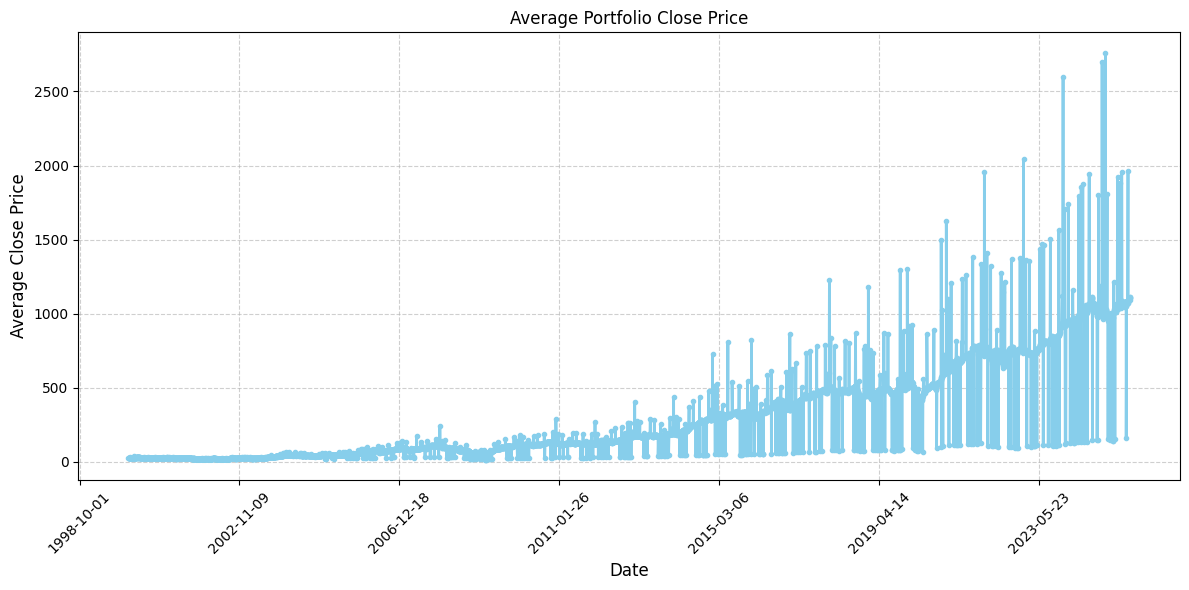

In [10]:
#Let's see the average close price for the stocks
portfolio_avg = df.groupby("Date")["Close"].mean()

# Plot
fig, ax = plt.subplots(figsize=(12,6)) 
portfolio_avg.plot(
    kind="line", 
    ax=ax,
    color="skyblue",
    linewidth=2,
    marker="o",
    markersize=3,
    title="Average Portfolio Close Price"
)

# Axis labels
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Average Close Price", fontsize=12)

# Rotate and format x-axis ticks
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))   # ~10 date ticks max

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

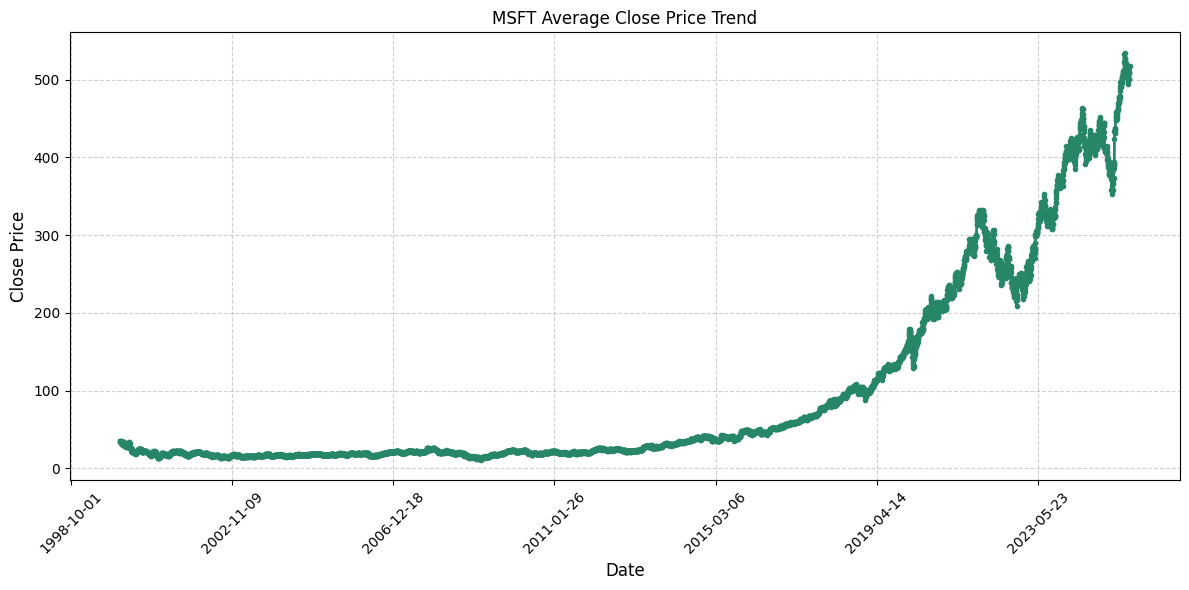

In [11]:
# Focus on BABA Close Price Trend for analysis
x = df[df["Ticker"] == "MSFT"]
# Group by Date and plot
fig, ax = plt.subplots(figsize=(12,6))  # bigger figure
x.groupby("Date")["Close"].mean().plot(
    kind="line", 
    ax=ax,
    color="#278668",
    linewidth=2,
    marker="o",
    markersize=3,
    title="MSFT Average Close Price Trend"
)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)
plt.xticks(rotation=45)

# Format date ticks (show fewer labels)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

#Alibaba - IPO was in September 2014

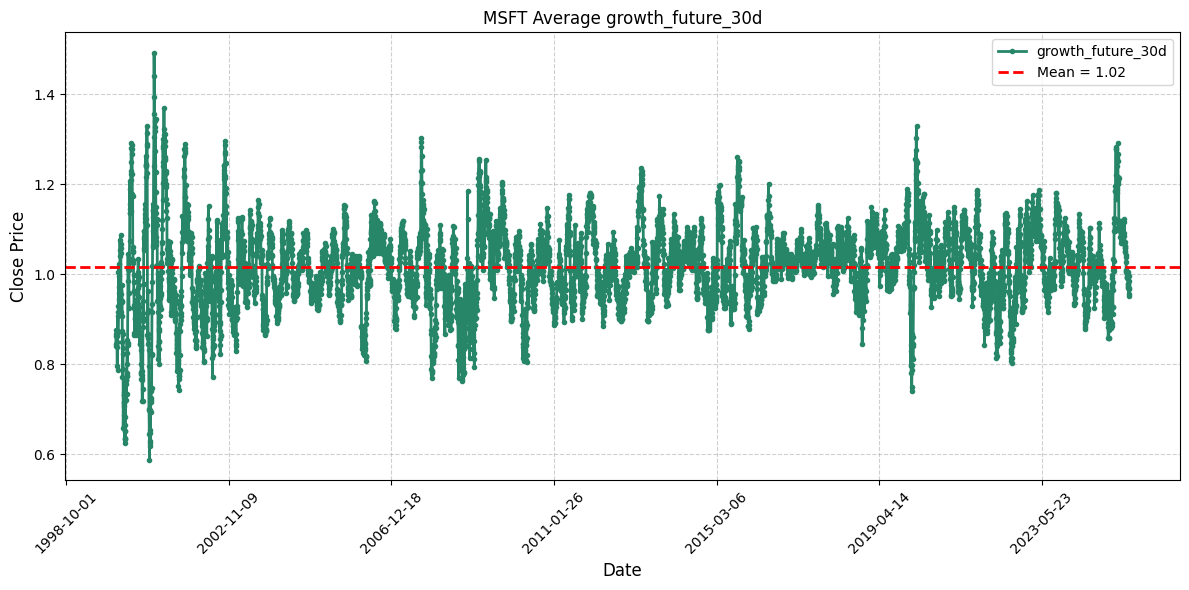

In [12]:
# Focus on BABA growth_30d Price Trend for analysis
x = df[df["Ticker"] == "MSFT"]
# Group by Date and plot
fig, ax = plt.subplots(figsize=(12,6))  # bigger figure
x.groupby("Date")["growth_future_30d"].mean().plot(
    kind="line", 
    ax=ax,
    color="#278668",
    linewidth=2,
    marker="o",
    markersize=3,
    title="MSFT Average growth_future_30d"
)
mean_growth = x["growth_future_30d"].mean()
ax.axhline(mean_growth, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_growth:.2f}")


ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)
plt.xticks(rotation=45)

# Format date ticks (show fewer labels)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()

#Alibaba - IPO was in September 2014

In [13]:
#Get the df for Alibab for analysis
df_baba = df[df["Ticker"]=="MSFT"].copy()
df_baba.sort_values("Date",ascending=True,inplace=True)
df_baba.set_index("Date",inplace=True)
df_baba.head()

#Risk metrics -- Compound anual growth rate
years = len(df_baba)/252
change = (df_baba["Close"].iloc[-1] / df_baba["Close"].iloc[0])
Metric = change**(1/years)-1
print(Metric)

0.10987069928987525


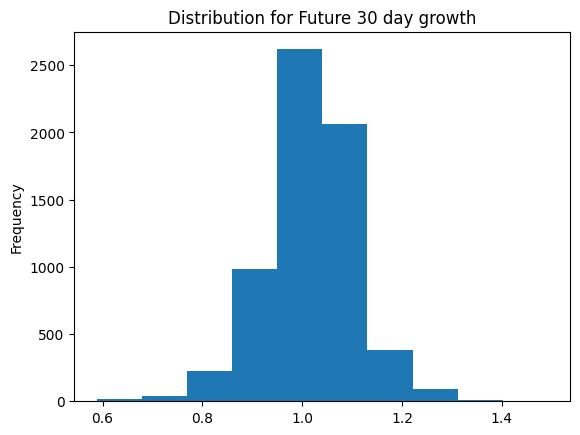

In [14]:
df_baba["growth_future_30d"].plot.hist(bins=10)
plt.title("Distribution for Future 30 day growth");

In [15]:
#Conduct test for normality on growth_future_30d
w = df_baba["growth_future_30d"].dropna()
print("Normality:",stats.normaltest(np.array(w)))
print("Skewness:", stats.skew(w))
print("Kurtosis:", stats.kurtosis(w))
# This indicates that the growth_30d isn't normally distributed.

Normality: NormaltestResult(statistic=np.float64(263.53917347587526), pvalue=np.float64(5.931924257393546e-58))
Skewness: -0.16315481683527985
Kurtosis: 1.618191571934668


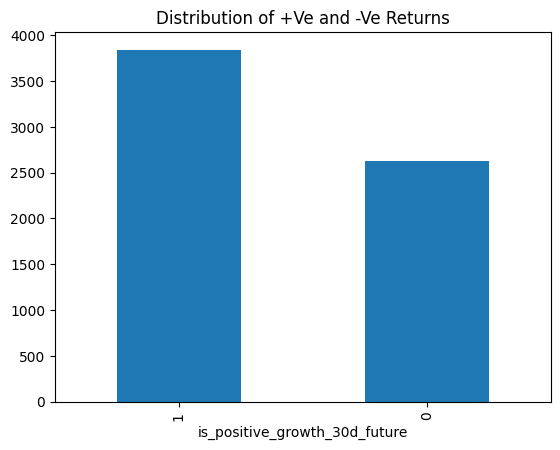

In [16]:
df_baba["is_positive_growth_30d_future"].value_counts().plot(kind="bar")
plt.title("Distribution of +Ve and -Ve Returns");


### Machine Learning Modelling

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [18]:
# growth indicators (but not future growth)
GROWTH = [g for g in df.keys() if (g.find('growth_')==0)&(g.find('future')<0)]
GROWTH

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_^GDAXI_1d',
 'growth_^GDAXI_3d',
 'growth_^GDAXI_7d',
 'growth_^GDAXI_30d',
 'growth_^GDAXI_90d',
 'growth_^GDAXI_365d',
 'growth_^GSPC_1d',
 'growth_^GSPC_3d',
 'growth_^GSPC_7d',
 'growth_^GSPC_30d',
 'growth_^GSPC_90d',
 'growth_^GSPC_365d',
 'growth_^DJI_1d',
 'growth_^DJI_3d',
 'growth_^DJI_7d',
 'growth_^DJI_30d',
 'growth_^DJI_90d',
 'growth_^DJI_365d',
 'growth_EPI_1d',
 'growth_EPI_3d',
 'growth_EPI_7d',
 'growth_EPI_30d',
 'growth_EPI_90d',
 'growth_EPI_365d',
 'growth_^VIX_1d',
 'growth_^VIX_3d',
 'growth_^VIX_7d',
 'growth_^VIX_30d',
 'growth_^VIX_90d',
 'growth_^VIX_365d',
 'growth_GC=F_1d',
 'growth_GC=F_3d',
 'growth_GC=F_7d',
 'growth_GC=F_30d',
 'growth_GC=F_90d',
 'growth_GC=F_365d',
 'growth_CL=F_1d',
 'growth_CL=F_3d',
 'growth_CL=F_7d',
 'growth_CL=F_30d',
 'growth_CL=F_90d',
 'growth_CL=F_365d',
 'growth_BZ=F_1d',
 'growth_BZ=F_3d',
 'growth_BZ=F_7d',
 'growth_BZ=F_30d

In [19]:
OHLCV = ['Open','High','Low','Close','Volume']
CATEGORICAL = ['Month', 'Weekday', 'Ticker']


TO_DROP = ['Year','Date','Quarter'] + CATEGORICAL + OHLCV
TO_PREDICT = [g for g in df.keys() if (g.find('future')>=0)]
TO_PREDICT
df['ln_volume'] = df.Volume.apply(lambda x: np.log(x))
CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'growing_moving_average', 'high_minus_low_relative','volatility', 'ln_volume']
MACRO = ['gdppot_us_yoy', 'gdppot_us_qoq', 'cpi_core_yoy', 'cpi_core_mom', 'FEDFUNDS',
 'DGS1', 'DGS5', 'DGS10']
TECHNICAL_INDICATORS = ['adx', 'adxr', 'apo', 'aroon_1','aroon_2', 'aroonosc',
 'bop', 'cci', 'cmo','dx', 'macd', 'macdsignal', 'macdhist', 'macd_ext',
 'macdsignal_ext', 'macdhist_ext', 'macd_fix', 'macdsignal_fix',
 'macdhist_fix', 'mfi', 'minus_di', 'mom', 'plus_di', 'dm', 'ppo',
 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'slowk', 'slowd', 'fastk',
 'fastd', 'fastk_rsi', 'fastd_rsi', 'trix', 'ultosc', 'willr',
 'ad', 'adosc', 'obv', 'atr', 'natr', 'ht_dcperiod', 'ht_dcphase',
 'ht_phasor_inphase', 'ht_phasor_quadrature', 'ht_sine_sine', 'ht_sine_leadsine',
 'ht_trendmod', 'avgprice', 'medprice', 'typprice', 'wclprice']
TECHNICAL_PATTERNS = [g for g in df.keys() if g.find('cdl')>=0]
NUMERICAL = GROWTH + TECHNICAL_INDICATORS + TECHNICAL_PATTERNS + CUSTOM_NUMERICAL + MACRO

C:\Users\rickens.otieno_4g-ca\AppData\Local\Temp\ipykernel_17656\346332325.py:8: RuntimeWarning: divide by zero encountered in log
  df['ln_volume'] = df.Volume.apply(lambda x: np.log(x))


In [20]:
#Confirm that all Technical indicators are present
OTHER = [k for k in df.keys() if k not in OHLCV + CATEGORICAL + NUMERICAL + TO_DROP]
OTHER

['Dividends',
 'Stock Splits',
 'growth_future_30d',
 'is_positive_growth_30d_future',
 'Capital Gains']

In [21]:
df[NUMERICAL].info()

<class 'pandas.core.frame.DataFrame'>
Index: 836268 entries, 0 to 2001
Columns: 190 entries, growth_1d to DGS10
dtypes: float64(127), int32(62), int64(1)
memory usage: 1020.8 MB


In [22]:
df["Month"] = pd.to_datetime(df["Month"], errors="coerce")
df.loc[:,'Month'] = df.Month.dt.strftime('%B')
df.loc[:,'Weekday'] = df.Weekday.astype(str)
dummy_variables = pd.get_dummies(df[CATEGORICAL], dtype='int32')

In [23]:
dummy_variables.head()

,Month_January,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Ticker_AAPL,Ticker_ABT,...,Ticker_VNA.DE,Ticker_WB,Ticker_WFC,Ticker_WIPRO.NS,Ticker_WMT,Ticker_XOM,Ticker_XPEV,Ticker_YUMC,Ticker_ZAL.DE,Ticker_ZTO
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_with_dummies = pd.concat([df, dummy_variables], axis=1)
DUMMIES = dummy_variables.keys().to_list()

In [25]:
df_with_dummies[NUMERICAL+DUMMIES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 836268 entries, 0 to 2001
Columns: 355 entries, growth_1d to Ticker_ZTO
dtypes: float64(127), int32(227), int64(1)
memory usage: 1.5 GB


In [26]:
corr_is_positive_growth_30d_future = df_with_dummies[NUMERICAL+DUMMIES+TO_PREDICT].corr()['is_positive_growth_30d_future']

In [27]:
corr_is_positive_growth_30d_future_df = pd.DataFrame(corr_is_positive_growth_30d_future)

In [28]:
corr_is_positive_growth_30d_future_df.sort_values(by='is_positive_growth_30d_future').head(5)

,is_positive_growth_30d_future
cpi_core_mom,-0.071238
cpi_core_yoy,-0.068025
DGS5,-0.049530
DGS10,-0.047401
gdppot_us_qoq,-0.044752


In [29]:
corr_is_positive_growth_30d_future_df.sort_values(by='is_positive_growth_30d_future').tail(8)

,is_positive_growth_30d_future
ultosc,0.015992
growth_GC=F_90d,0.016067
growth_^VIX_30d,0.016944
growth_CL=F_30d,0.018996
growth_^VIX_90d,0.037538
is_positive_growth_30d_future,1.000000
cdlmathold,NaN
Month_January,NaN


In [30]:
corr_growth_future_30d = df_with_dummies[NUMERICAL+DUMMIES+TO_PREDICT].corr()['growth_future_30d']

In [31]:
corr_growth_future_30d_df = pd.DataFrame(corr_growth_future_30d)

In [32]:
corr_growth_future_30d_df.sort_values(by='growth_future_30d').head(5)

,growth_future_30d
ln_volume,-0.004488
ht_dcperiod,-0.004298
adxr,-0.003916
adx,-0.003621
willr,-0.003560


In [33]:
corr_growth_future_30d_df.sort_values(by='growth_future_30d').tail(8)

,growth_future_30d
cdldojistar,0.005268
plus_di,0.005509
is_positive_growth_30d_future,0.005883
Ticker_LIN.DE,0.027835
natr,0.858434
growth_future_30d,1.000000
cdlmathold,NaN
Month_January,NaN


In [34]:
def temporal_split(df, min_date, max_date, train_prop=0.7, val_prop=0.15, test_prop=0.15):
    """
    Splits a DataFrame into three buckets based on the temporal order of the 'Date' column.

    Args:
        df (DataFrame): The DataFrame to split.
        min_date (str or Timestamp): Minimum date in the DataFrame.
        max_date (str or Timestamp): Maximum date in the DataFrame.
        train_prop (float): Proportion of data for training set (default: 0.6).
        val_prop (float): Proportion of data for validation set (default: 0.2).
        test_prop (float): Proportion of data for test set (default: 0.2).

    Returns:
        DataFrame: The input DataFrame with a new column 'split' indicating the split for each row.
    """
    # Define the date intervals
    train_end = min_date + pd.Timedelta(days=(max_date - min_date).days * train_prop)
    val_end = train_end + pd.Timedelta(days=(max_date - min_date).days * val_prop)

    # Assign split labels based on date ranges
    split_labels = []
    for date in df['Date']:
        if date <= train_end:
            split_labels.append('train')
        elif date <= val_end:
            split_labels.append('validation')
        else:
            split_labels.append('test')

    # Add 'split' column to the DataFrame
    df['split'] = split_labels

    return df

In [35]:
min_date_df = df_with_dummies.Date.min()
max_date_df = df_with_dummies.Date.max()

df_with_dummies = temporal_split(df_with_dummies,
                                 min_date = min_date_df,
                                 max_date = max_date_df)

In [36]:
df_with_dummies['split'].value_counts()/len(df_with_dummies)

split
train         0.643822
test          0.181448
validation    0.174730
Name: count, dtype: float64

In [37]:
new_df = df_with_dummies.copy()

In [38]:
new_df.groupby(by='split')['growth_future_30d'].describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,147029.0,1.014782,0.136461,0.061995,0.944499,1.010002,1.077775,10.178902
train,538408.0,1.104689,28.459635,-3.867505,0.958666,1.019525,1.083748,17214.998225
validation,146121.0,1.023931,0.150904,0.150530,0.953324,1.019191,1.085969,8.070953


In [39]:
new_df.groupby(['split'])['Date'].agg({'min','max','count'})

,count,min,max
split,,,
test,151739,2021-11-10,2025-09-19
train,538408,2000-01-03,2018-01-01
validation,146121,2018-01-02,2021-11-09


In [40]:
pd.set_option('display.max_rows', None)

new_df[NUMERICAL+DUMMIES].describe().T

c:\Users\rickens.otieno_4g-ca\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
growth_1d,836192.0,1.012127e+00,4.402453e+00,-3.964145e+00,9.903981e-01,1.000088e+00,1.010657e+00,3.750000e+03
growth_3d,836040.0,1.048234e+00,3.022166e+01,-3.997350e+00,9.834099e-01,1.001433e+00,1.020259e+00,2.725000e+04
growth_7d,835736.0,1.020101e+00,4.409921e+00,-3.997337e+00,9.755531e-01,1.004012e+00,1.033553e+00,3.205882e+03
growth_30d,833988.0,1.074565e+00,2.286698e+01,-3.867505e+00,9.550330e-01,1.017847e+00,1.083175e+00,1.721500e+04
growth_90d,829374.0,1.132358e+00,3.174250e+01,-3.851893e+00,9.397348e-01,1.049242e+00,1.169064e+00,2.850000e+04
growth_365d,807733.0,1.435583e+00,3.540770e+00,-1.245042e+02,9.547115e-01,1.198876e+00,1.504154e+00,4.996995e+02
growth_^GDAXI_1d,835151.0,9.861772e-01,1.187303e-01,0.000000e+00,9.935641e-01,1.000595e+00,1.006969e+00,1.114020e+00
growth_^GDAXI_3d,835151.0,9.867987e-01,1.203185e-01,0.000000e+00,9.888847e-01,1.001785e+00,1.013553e+00,1.144124e+00
growth_^GDAXI_7d,835151.0,9.881313e-01,1.232385e-01,0.000000e+00,9.840361e-01,1.004436e+00,1.021056e+00,1.232460e+00
growth_^GDAXI_30d,835151.0,9.956537e-01,1.379947e-01,0.000000e+00,9.731712e-01,1.014202e+00,1.049760e+00,1.288371e+00


In [41]:
# Split the data into training and testing sets based on the split date
features_list = NUMERICAL+DUMMIES
to_predict = 'is_positive_growth_30d_future'

train_df = new_df[new_df.split.isin(['train','validation'])].copy(deep=True)
test_df = new_df[new_df.split.isin(['test'])].copy(deep=True)

# ONLY numerical Separate features and target variable for training and testing sets
# need Date and Ticker later when merging predictions to the dataset
X_train = train_df[features_list+[to_predict,'Date','Ticker']]
X_test = test_df[features_list+[to_predict,'Date','Ticker']]

print(f'length: X_train {X_train.shape},  X_test {X_test.shape}')

length: X_train (684529, 358),  X_test (151739, 358)


In [42]:
# Can't have +-inf values . E.g. ln(volume)=-inf when volume==0 => substitute with 0
# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Need to fill NaNs somehow
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

print(f'length: X_train_imputed {X_train.shape},  X_test_imputed {X_test.shape}')

length: X_train_imputed (684529, 358),  X_test_imputed (151739, 358)


In [43]:
X_train_imputed = X_train
X_test_imputed = X_test

In [44]:
y_train = X_train_imputed[to_predict]
y_test = X_test_imputed[to_predict]

# remove y_train, y_test from X_ dataframes
del X_train_imputed[to_predict]
del X_test_imputed[to_predict]

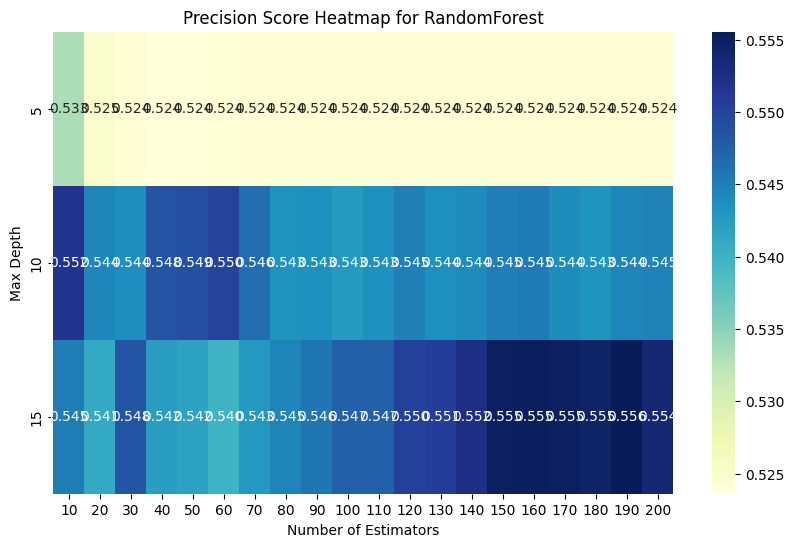

In [ ]:
#Hyperparameter tuning
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42,
                                    n_jobs = -1)
        rf.fit(X_train_imputed.drop(['Date', 'Ticker'], axis=1), y_train)
        
        y_pred = rf.predict(X_test_imputed.drop(["Date", "Ticker"], axis=1))
        ps = precision_score(y_test, y_pred)
        
        scores.append((d, n, ps))

# Convert results into a DataFrame
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "precision"])

# Pivot for heatmap
heatmap_data = df_scores.pivot(index="max_depth", columns="n_estimators", values="precision")

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Precision Score Heatmap for RandomForest")
plt.ylabel("Max Depth")
plt.xlabel("Number of Estimators")
plt.show()

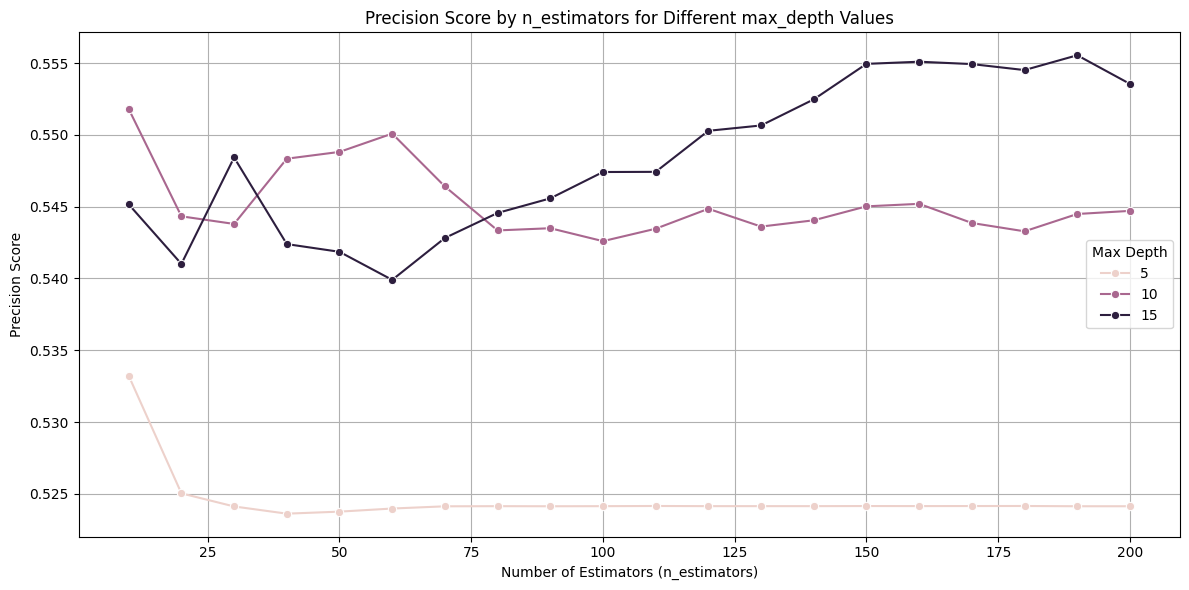

In [54]:
# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_scores, x="n_estimators", y="precision", hue="max_depth", marker="o")

plt.title("Precision Score by n_estimators for Different max_depth Values")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Precision Score")
plt.legend(title="Max Depth")
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
#Best params
d = 15
n= 150
rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42,
                                    n_jobs = -1)
rf.fit(X_train_imputed.drop(['Date', 'Ticker'], axis=1), y_train)
        
y_pred = rf.predict(X_test_imputed.drop(["Date", "Ticker"], axis=1))
ps = precision_score(y_test, y_pred)

#Making Inference
X_all = pd.concat([X_train_imputed,X_test_imputed], axis=0,ignore_index=True)
y_pred_probs = rf.predict_proba(X_all.drop(["Date", "Ticker"], axis=1))
y_predicts = [p[1] for p in y_pred_probs]
X_all["BuyScore"] = y_predicts
X_all["BuyScore_rank"] = (
    X_all.groupby("Date")["BuyScore"]
    .rank(method="first", ascending=False)
)
X_all.sort_values(["Date", "BuyScore_rank"],ascending=[False,True]).head(10)

,growth_1d,growth_3d,growth_7d,growth_30d,growth_90d,growth_365d,growth_^GDAXI_1d,growth_^GDAXI_3d,growth_^GDAXI_7d,growth_^GDAXI_30d,...,Ticker_WMT,Ticker_XOM,Ticker_XPEV,Ticker_YUMC,Ticker_ZAL.DE,Ticker_ZTO,Date,Ticker,BuyScore,BuyScore_rank
687432,1.010673,1.014174,1.065017,1.297312,1.610857,1.681815,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,GOOGL,0.635710,1.0
765594,1.009364,1.037039,1.053960,1.071043,1.089032,1.167037,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,SBIN.NS,0.633851,2.0
799089,0.997805,0.985137,1.009775,1.064294,1.002333,1.040157,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,HAVELLS.NS,0.632938,3.0
769422,1.002560,1.013111,1.061490,1.055473,0.940262,1.086467,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,AXISBANK.NS,0.631224,4.0
730992,1.019201,1.056226,1.048243,0.903244,1.040089,1.092095,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,INTU,0.631046,5.0
801003,0.998081,1.002716,0.979293,0.975703,0.936370,0.758743,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,TATAELXSI.NS,0.625674,6.0
748416,1.010484,0.995234,1.028736,1.289095,1.419026,1.754496,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,WB,0.624914,7.0
735832,1.000739,1.093384,1.257900,1.547388,1.482963,1.271011,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,BIDU,0.622219,8.0
714536,0.999101,1.058706,1.103166,1.118479,1.366951,1.259135,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,CAT,0.620253,9.0
703888,0.995712,0.986333,1.005953,1.082550,1.116988,1.204644,0.998517,1.013295,1.000273,0.978337,...,0,0,0,0,0,0,2025-09-19,HD,0.619347,10.0
